In [2]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import load_model


In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()


In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

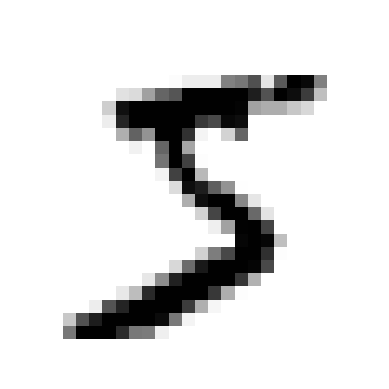

5


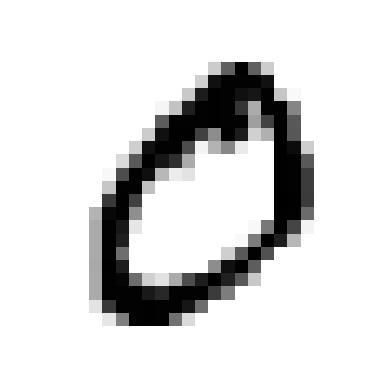

0


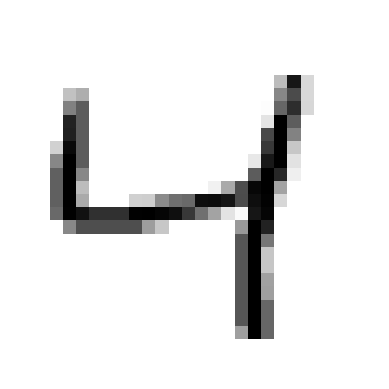

4


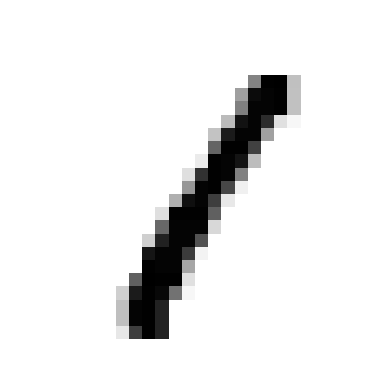

1


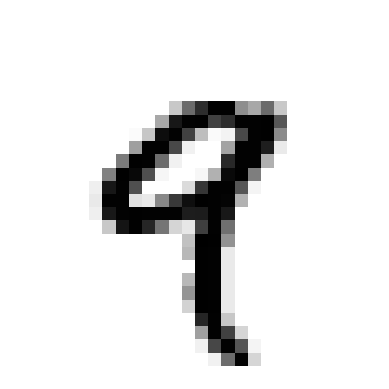

9


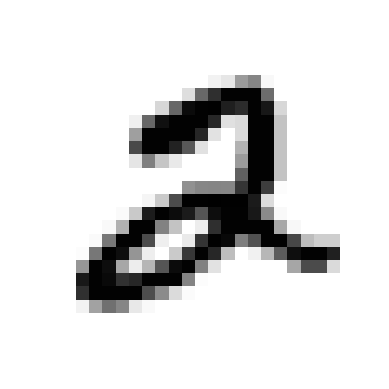

2


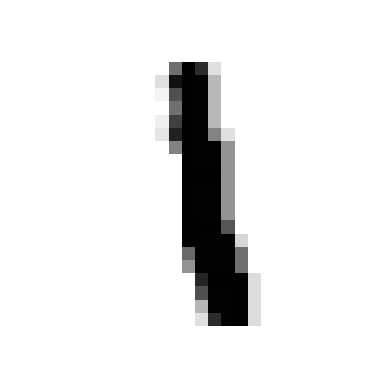

1


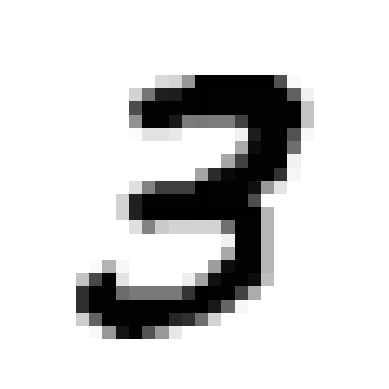

3


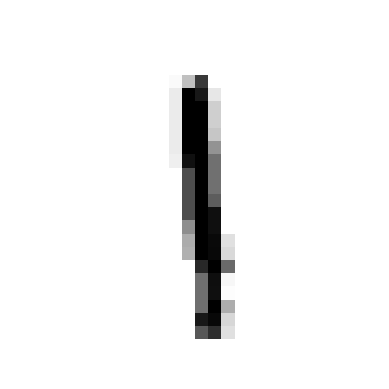

1


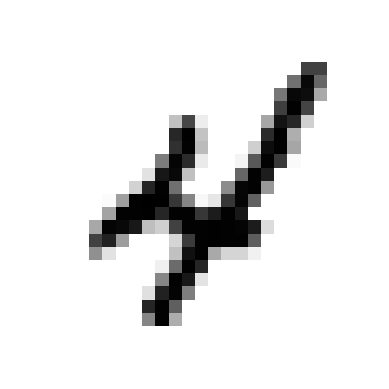

4


In [6]:
for i in range(10):
    random = x_train[i]
    plt.imshow(random , cmap="binary")
    plt.axis("off")
    plt.show()
    print(y_train[i])

In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28 , 1)

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
y_train=to_categorical(y_train , 10)
y_test=to_categorical(y_test , 10)

In [10]:
model=Sequential()

model.add(Conv2D(6 , kernel_size=(3,3) , activation='relu' , input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(10 , kernel_size=(3,3) , activation='relu' , input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(300 , activation='relu'))

model.add(Dense(200 , activation='relu'))

model.add(Dense(100 , activation='relu'))

model.add(Dense(50 , activation='relu'))

model.add(Dense(10 , activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        550       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 300)               7

In [12]:
model.compile(loss=categorical_crossentropy , optimizer=Adam() , metrics=["accuracy"] )

In [13]:
model.fit(x_train , y_train , epochs=15 , batch_size=128 , verbose=1 , validation_data=(x_test, y_test) )

Epoch 1/15


469/469 [==============================] - 5s 7ms/step - loss: 0.3210 - accuracy: 0.9014 - val_loss: 0.1208 - val_accuracy: 0.9622
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0925 - accuracy: 0.9714 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0506 - val_accuracy: 0.9834
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 0.0569 - val_accuracy: 0.9825
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0465 - val_accuracy: 0.9859
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0457 - val_accuracy: 0.9858
Epoc

In [14]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.9866
Test Loss: 0.057317957282066345
Test accuracy: 0.9865999817848206


In [15]:
model.save("mnist_model.h5")

C:\Users\mahmo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
loaded_model = load_model('mnist_model.h5')

In [17]:
index=17
image= x_test[index]
label=y_test[index]

In [18]:
image=image.reshape(1,28,28,1)

In [19]:
predicted_label = loaded_model.predict(image)
predicted_label = np.argmax(label)

1/1 [==============================] - 0s 104ms/step


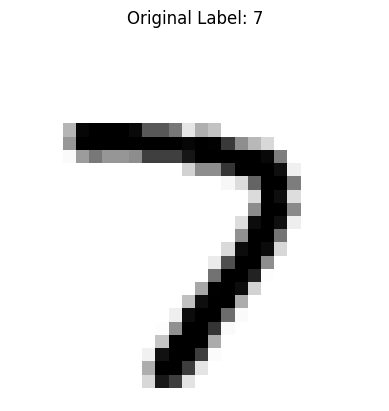

In [20]:
plt.imshow(image.reshape(28, 28), cmap='binary')
plt.title(f'Original Label: {np.argmax(label)}')
plt.axis('off')
plt.show()